# Geometric distribution

In [98]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
        
    l = 1
    print('Реализация выборки объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    return A

<font color='red'> Моделирование выбранных случайных величин </font>

 Для n = 5:

In [109]:
#make_vibor(5)

Для n = 10:

In [110]:
#make_vibor(10)

Для n = 100:

In [111]:
#make_vibor(100)

Для n = 1000:

In [112]:
#make_vibor(1000)

Для n = 10**5:

In [113]:
#make_vibor(10**5)

<font color='red'> Построение эмпирической функции распределения </font> 

In [62]:
# Для удобства уберем вывод
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
        
    l = 1
    #print('Реализация выборки объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    return A

In [66]:
import pylab
import math 
import matplotlib
import numpy as np
import scipy.stats as sc
from scipy.stats import geom
import matplotlib.pyplot as plt
from random import randint

def make_efr(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    #x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            pylab.legend ()
            #plt.show()

    return upper_list


from scipy.stats import geom
import matplotlib.pyplot as plt


def make_сdf(p):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
    
    pylab.figure (1)
    ax.plot(x, geom.cdf(x, p), 'bo', ms = 8, label = 'geom cdf')
    #ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

    rv = sc.geom(p)
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, abs(fin))
    
    

<font color='blue'>Эфр для выборок объема 5: </font> 

In [64]:
M = make_vibor(5)

[]

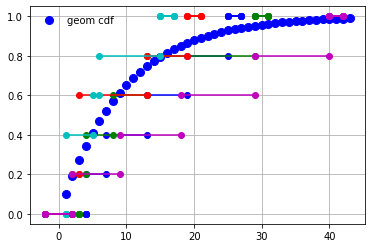

In [334]:
make_сdf(0.1)
make_efr(M, 5)



<font color='blue'>Эфр для выборок объема 10: </font> 

In [187]:
M = make_vibor(10)

1): [3, 14, 46, 1, 4, 0, 5, 15, 5, 23]
2): [6, 3, 0, 30, 7, 18, 2, 1, 4, 11]
3): [24, 1, 1, 7, 5, 7, 2, 0, 19, 5]
4): [3, 40, 2, 5, 0, 42, 19, 2, 6, 13]
5): [25, 23, 1, 2, 13, 1, 1, 1, 1, 2]


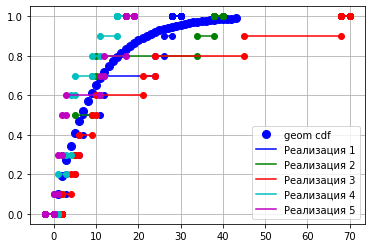

In [139]:
make_сdf(0.1)
make_efr(M, 10)

<font color='blue'>Эфр для выборок объема 100: </font> 

In [140]:
M = make_vibor(100)

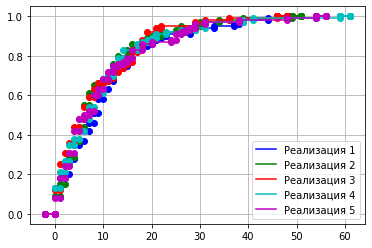

In [141]:
make_efr(M, 100)

<font color='blue'>Эфр для выборок объема 1000: </font> 

In [123]:
M = make_vibor(1000)

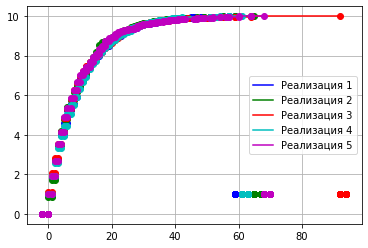

In [124]:
make_efr(M, 100)

<font color='blue'>Эфр для выборок объема 10**5: </font> 

In [125]:
M = make_vibor(10**5)

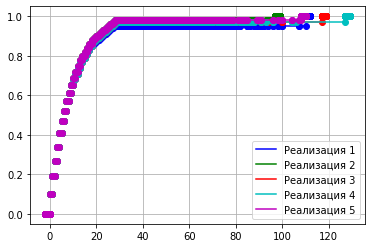

In [126]:
make_efr(M, 10**5)

<font color='red'> Нахождение точной верхней границы </font> 

<font color='green'> Для n = 5: </font> 

In [61]:
M = make_vibor(5)

NameError: name 'make_vibor' is not defined

In [395]:
upper_limit(M, 5, 4)

Точная верхняя граница выборки объема 5:  0.2


<font color='green'> Для n = 10: </font> 

In [396]:
M = make_vibor(10)

In [397]:
upper_limit(M, 10, 4)

Точная верхняя граница выборки объема 10:  0.3


<font color='green'> Для n = 100: </font> 

In [398]:
M = make_vibor(100)

In [399]:
upper_limit(M, 100, 4)

Точная верхняя граница выборки объема 100:  0.15999999999999998


<font color='green'> Для n = 1000: </font> 

In [400]:
M = make_vibor(1000)

In [401]:
upper_limit(M, 1000, 4)

Точная верхняя граница выборки объема 1000:  0.08000000000000007


<font color='green'> Для n = 10**5: </font> 

In [402]:
M = make_vibor(10**5)

In [403]:
upper_limit(M, 10**5, 4)

Точная верхняя граница выборки объема 100000:  0.07


<font color='red'> Построение вариационного ряда </font> 

Для удобства уберем все выводы

In [96]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
    return A
    ''' 
    l = 1
    print('Реализация выборки объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    '''


In [61]:
import scipy.stats as st
import pandas as pd

r = st.geom.rvs(0.1, size=10)
#print(r)
s = pd.Series([1,3,3,4,4,4,5,7,9,15])
s.quantile(0.14)

3.0

In [395]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row(n, M):
    dict_set = {}
    
    print('Вариационные ряды для 5 реализаций выборки, объема  %d:  '%n)
    print('')
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            for k in s1:
                dict_set[k] = 0

            for t in i:
                dict_set[t] += 1

            
            print('X:', end= '\t')
            
            for elem in dict_set:
                print(elem, end='\t')
            print('')
            print('----------'*n)
            print('f:', end= '\t')
            
            for elem in dict_set:
                print(dict_set[elem], end='\t')
            print('')
            print('')
            print('')
            print('')
            #print('------')

Для n = 5

In [396]:
M1 = make_vibor(5)

Реализация выборки объема 5: 

1): [15, 1, 5, 1, 0]
2): [2, 6, 9, 25, 0]
3): [8, 5, 7, 1, 4]
4): [0, 8, 17, 13, 21]
5): [18, 1, 0, 7, 3]


In [397]:
make_var_row(5, M1)

Вариационные ряды для 5 реализаций выборки, объема  5:  

X:	0	1	5	15	
--------------------------------------------------
f:	1	2	1	1	



X:	0	2	6	9	25	
--------------------------------------------------
f:	1	1	1	1	1	



X:	1	4	5	7	8	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0	8	13	17	21	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0	1	3	7	18	
--------------------------------------------------
f:	1	1	1	1	1	





Для n = 10

In [398]:
M2 = make_vibor(10)

Реализация выборки объема 10: 

1): [14, 7, 5, 2, 39, 19, 16, 5, 0, 1]
2): [3, 0, 8, 2, 1, 1, 23, 6, 1, 1]
3): [33, 15, 13, 12, 1, 3, 0, 6, 9, 2]
4): [0, 28, 3, 1, 0, 0, 1, 5, 16, 0]
5): [12, 17, 6, 8, 3, 4, 4, 0, 5, 1]


In [399]:
make_var_row(10, M2)

Вариационные ряды для 5 реализаций выборки, объема  10:  

X:	0	1	2	5	7	14	16	19	39	
----------------------------------------------------------------------------------------------------
f:	1	1	1	2	1	1	1	1	1	



X:	0	1	2	3	6	8	23	
----------------------------------------------------------------------------------------------------
f:	1	4	1	1	1	1	1	



X:	0	1	2	3	6	9	12	13	15	33	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0	1	3	5	16	28	
----------------------------------------------------------------------------------------------------
f:	4	2	1	1	1	1	



X:	0	1	3	4	5	6	8	12	17	
----------------------------------------------------------------------------------------------------
f:	1	1	1	2	1	1	1	1	1	





Для n = 100:

In [238]:
M3 = make_vibor(100)

make_var_row(100, M3)

Для n = 1000:

In [241]:
M4 = make_vibor(1000)

In [ ]:
make_var_row(1000, M4)

Для n = 10**5

In [244]:
M5 = make_vibor(10**5)

In [ ]:
make_var_row(10**5, M5)

<font color='blue'> Нахождение квантильи </font>

In [60]:
def upper_limit_quan(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        



    print(lol)

In [67]:
upper_limit_quan(M,5, 2)

[0.4, 0.2]


In [59]:
import scipy.stats as st
import pandas as pd
import numpy as np

def find_quantile(level):
    geom_numbers = st.geom.rvs(0.1, size=10)

    s = pd.Series(geom_numbers)

    quan = s.quantile(level)
    print('Квантиль уровня ', level,':',  float('{:.3f}'.format(quan)))

    
def get_my_quantile(level):
    

In [56]:
find_quantile(0.1)

Квантиль уровня  0.1 : 1.9


In [57]:
find_quantile(0.5)

Квантиль уровня  0.5 : 4.5


In [58]:
find_quantile(0.7)

Квантиль уровня  0.7 : 14.3
